In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt 
import seaborn as sns

In [2]:
df_05 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202205-divvy-tripdata.csv')
df_06 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202206-divvy-tripdata.csv')
df_07 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202207-divvy-tripdata.csv')
df_08 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202208-divvy-tripdata.csv')
df_09 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202209-divvy-publictripdata.csv')
df_10 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202210-divvy-tripdata.csv')
df_11 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202211-divvy-tripdata.csv')
df_12 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202212-divvy-tripdata.csv')
df_01 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202301-divvy-tripdata.csv')
df_02 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202302-divvy-tripdata.csv')
df_03 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202303-divvy-tripdata.csv')
df_04 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202304-divvy-tripdata.csv')

In [3]:
df = pd.concat([df_05, df_06, df_07, df_08, df_09, df_10, df_11, df_12, df_01, df_02, df_03, df_04], ignore_index=True)

In [5]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859056,8B441A6C436E9900,classic_bike,2023-04-29 21:20:21,2023-04-29 21:30:19,Halsted St & 18th St,13099,Blue Island Ave & 18th St,13135,41.857506,-87.645991,41.857556,-87.661535,casual
5859057,3980D64BE11540F1,classic_bike,2023-04-24 09:16:05,2023-04-24 09:22:27,Halsted St & 18th St,13099,Blue Island Ave & 18th St,13135,41.857506,-87.645991,41.857556,-87.661535,casual
5859058,3EF4B49FF7DAA02C,classic_bike,2023-04-18 07:53:51,2023-04-18 07:59:16,Franklin St & Jackson Blvd,TA1305000025,Clark St & Randolph St,TA1305000030,41.877708,-87.635321,41.884576,-87.631890,casual
5859059,210B2ED6583DC231,classic_bike,2023-04-29 07:33:55,2023-04-29 07:38:57,Michigan Ave & Lake St,TA1305000011,Clark St & Randolph St,TA1305000030,41.886022,-87.624398,41.884576,-87.631890,casual


In [32]:
#df = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202205-divvy-tripdata.csv')

In [4]:
# Gruppieren nach Stationsname und Berechnen der Durchschnittskoordinaten
grouped_stations = df.groupby('start_station_name').agg(
    avg_lat=('start_lat', 'mean'),
    avg_lng=('start_lng', 'mean')
).reset_index()


In [5]:
test = df[['start_station_name', 'start_lat', 'start_lng']].drop_duplicates()

In [6]:
# Umwandlung der 'started_at' und 'ended_at' Spalten in datetime (falls noch nicht geschehen)
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Berechnung der Dauer jeder Fahrt in Minuten
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [7]:
# Entfernen aller Fahrten, die kürzer als 5 Minuten sind
df = df[df['ride_duration'] >= 5]

In [4]:
# Gruppieren nach Stationsname und Behalten der ersten Koordinate jeder Gruppe
unique_stations = df.groupby('start_station_name').first().reset_index()



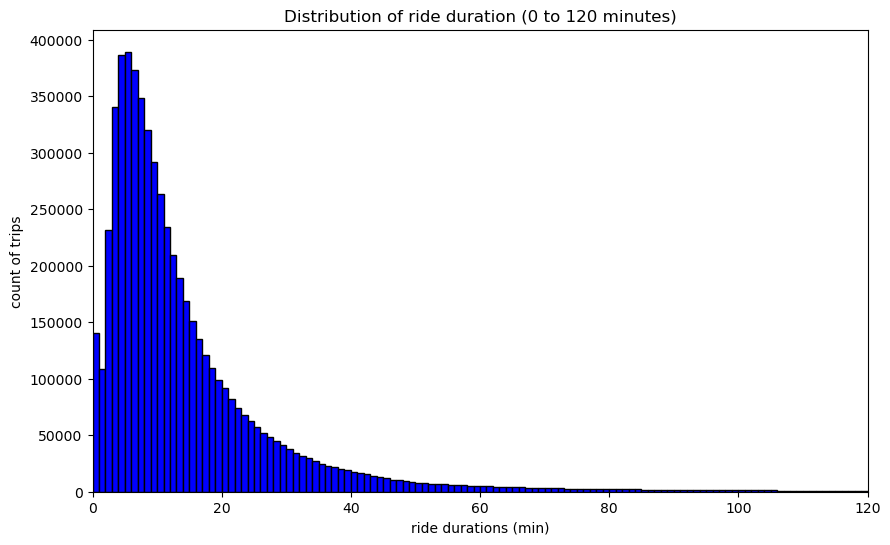

In [12]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Angenommen, die 'ride_duration' ist bereits in Minuten berechnet und im DataFrame df enthalten
# Erstellen eines Histogramms zur Visualisierung der Verteilung der Fahrdauern, wobei die X-Achse von 0 bis 120 Minuten reicht
plt.figure(figsize=(10, 6))
plt.hist(df['ride_duration'], bins=range(0, 121), color='blue', edgecolor='black')
plt.title('Distribution of ride duration (0 to 120 minutes)')
plt.xlabel('ride durations (min)')
plt.ylabel('count of trips')
plt.xlim(0, 120)  # Beschränkung der X-Achse auf 0 bis 120 Minuten
plt.show()






(5.0, 120.0)

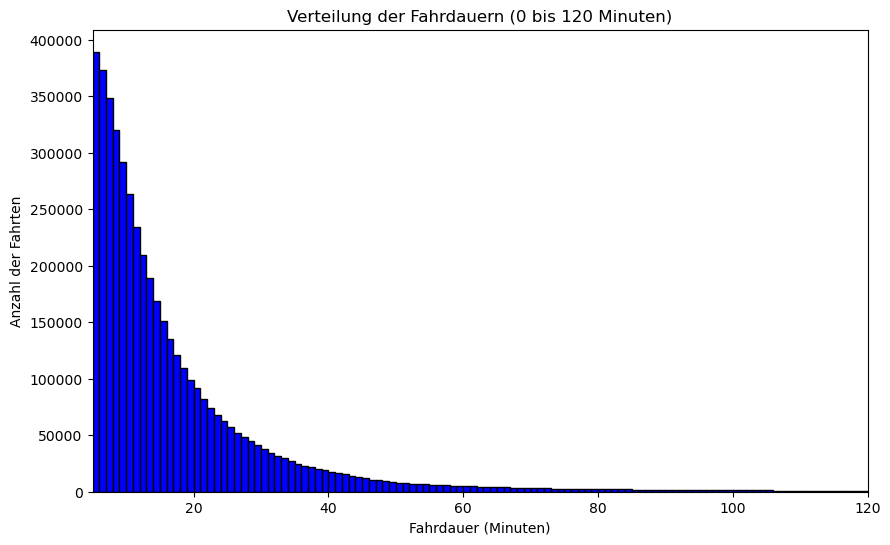

In [8]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Angenommen, die 'ride_duration' ist bereits in Minuten berechnet und im DataFrame df enthalten
# Erstellen eines Histogramms zur Visualisierung der Verteilung der Fahrdauern, wobei die X-Achse von 0 bis 120 Minuten reicht
fig, ax = plt.subplots(figsize=(10, 6))  # Erstelle eine Figure und eine Axes
ax.hist(df['ride_duration'], bins=range(5, 121), color='blue', edgecolor='black')
ax.set_title('Verteilung der Fahrdauern (0 bis 120 Minuten)')
ax.set_xlabel('Fahrdauer (Minuten)')
ax.set_ylabel('Anzahl der Fahrten')
ax.set_xlim(5, 120)  # Beschränkung der X-Achse auf 0 bis 120 Minuten




In [51]:
df.ride_duration.mean()

23.049671331867195

DataFrame shape: (4651247, 14)
DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4651247 entries, 0 to 5859059
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_duration       float64       
dtypes: datetime64[ns](2), float64(5), object(7)
memory usage: 532.3+ MB
First few rows:
            ride_id rideable_type          started_at            ended_at  \
0  EC2DE40644C6B0F4  classic_bike 

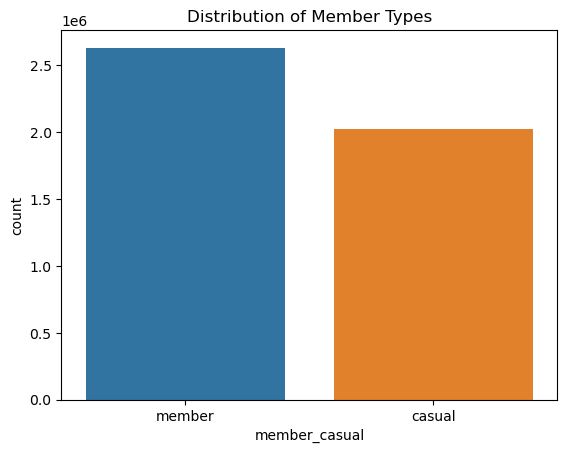

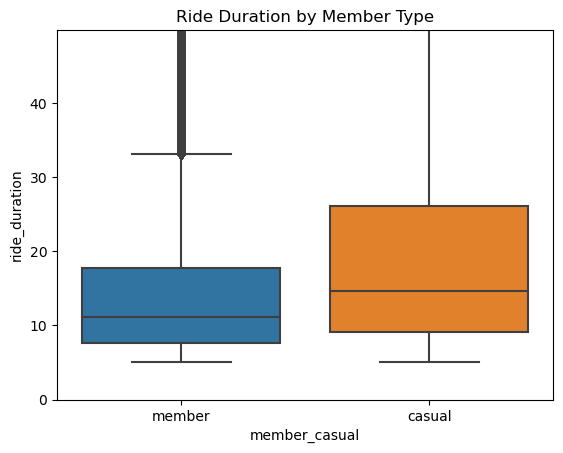

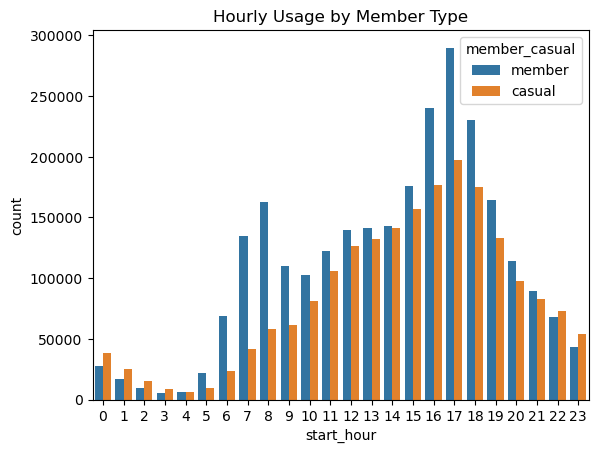

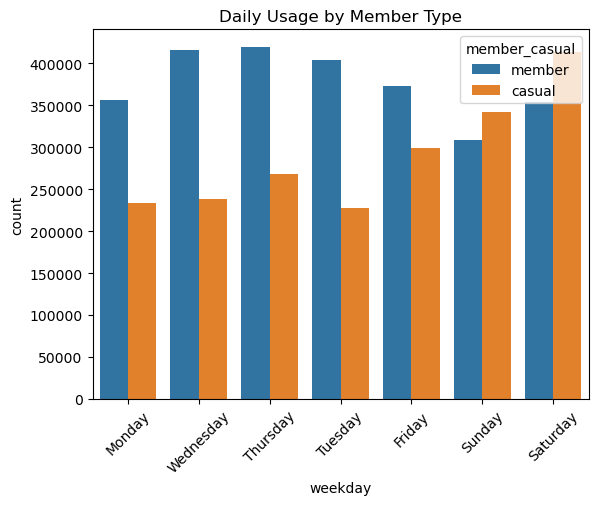

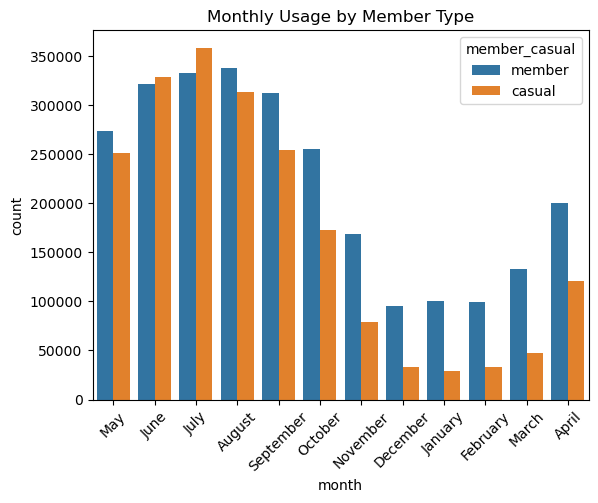

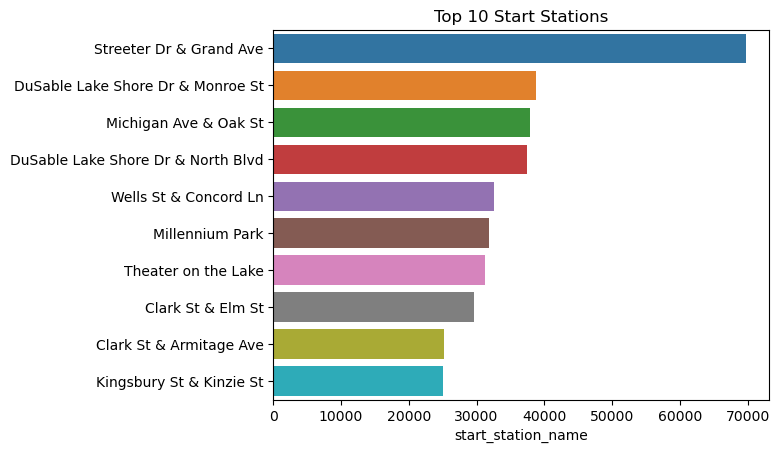

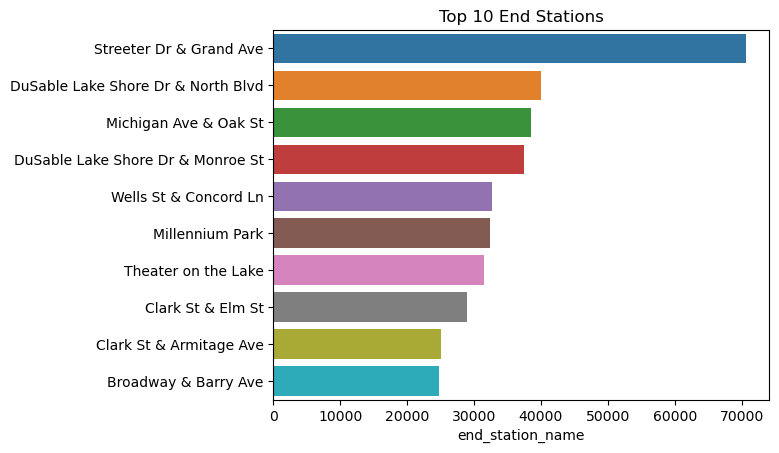

/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_1407/430550759.py:65: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


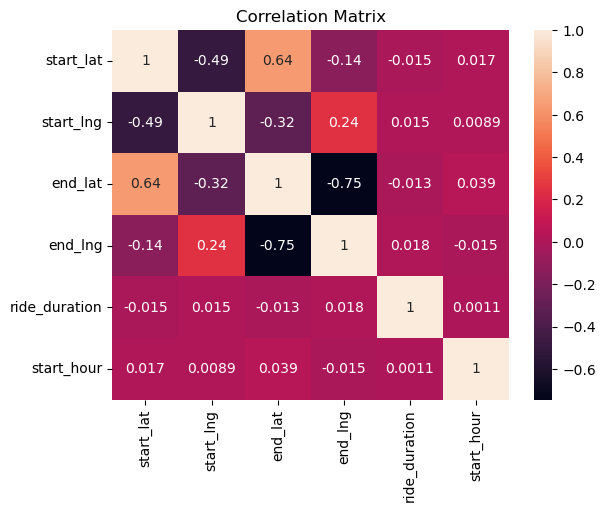

In [10]:


# Grundlegende Informationen
print("DataFrame shape:", df.shape)
print("DataFrame info:")
df.info()

# Erste paar Zeilen anzeigen
print("First few rows:")
print(df.head())

# Überprüfung fehlender Werte
print("Missing values:")
print(df.isnull().sum())

# Basisstatistik
print("Descriptive statistics:")
print(df.describe())

# Nutzertypen ('member_casual')
sns.countplot(x='member_casual', data=df)
plt.title('Distribution of Member Types')
plt.show()

# Analyse der Fahrtzeiten
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
sns.boxplot(x='member_casual', y='ride_duration', data=df)
plt.title('Ride Duration by Member Type')
plt.ylim(0, df['ride_duration'].quantile(0.95))  # Begrenzung auf 95. Perzentil
plt.show()

# Tageszeitliche Nutzung
df['start_hour'] = df['started_at'].dt.hour
sns.countplot(x='start_hour', hue='member_casual', data=df)
plt.title('Hourly Usage by Member Type')
plt.show()

# Wochentagsanalyse
df['weekday'] = df['started_at'].dt.day_name()
sns.countplot(x='weekday', hue='member_casual', data=df)
plt.title('Daily Usage by Member Type')
plt.xticks(rotation=45)
plt.show()

# Monatsanalyse
df['month'] = df['started_at'].dt.month_name()
sns.countplot(x='month', hue='member_casual', data=df)
plt.title('Monthly Usage by Member Type')
plt.xticks(rotation=45)
plt.show()

# Untersuchung der Start- und Endstationen
top_start_stations = df['start_station_name'].value_counts().head(10)
sns.barplot(x=top_start_stations, y=top_start_stations.index)
plt.title('Top 10 Start Stations')
plt.show()

top_end_stations = df['end_station_name'].value_counts().head(10)
sns.barplot(x=top_end_stations, y=top_end_stations.index)
plt.title('Top 10 End Stations')
plt.show()

# Korrelationen (falls relevant)
# Beachten Sie, dass die Korrelationsanalyse meist für numerische Daten sinnvoll ist
correlations = df.corr()
sns.heatmap(correlations, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Weitere Analysen können hinzugefügt werden, basierend auf spezifischen Fragestellungen


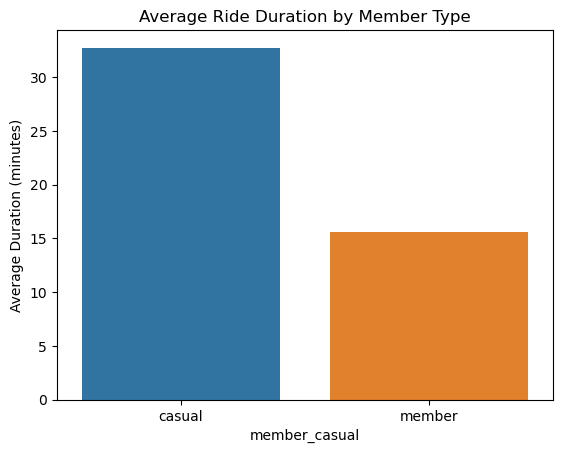

In [11]:
avg_ride_duration_by_member = df.groupby('member_casual')['ride_duration'].mean()
sns.barplot(x=avg_ride_duration_by_member.index, y=avg_ride_duration_by_member.values)
plt.title('Average Ride Duration by Member Type')
plt.ylabel('Average Duration (minutes)')
plt.show()


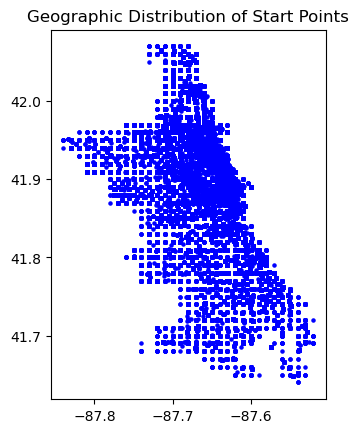

In [12]:
import geopandas as gpd
from shapely.geometry import Point

# Erstellen von Geopandas DataFrames
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.start_lng, df.start_lat))

# Einfache Visualisierung der Startpunkte
gdf.plot(marker='o', color='blue', markersize=5)
plt.title('Geographic Distribution of Start Points')
plt.show()


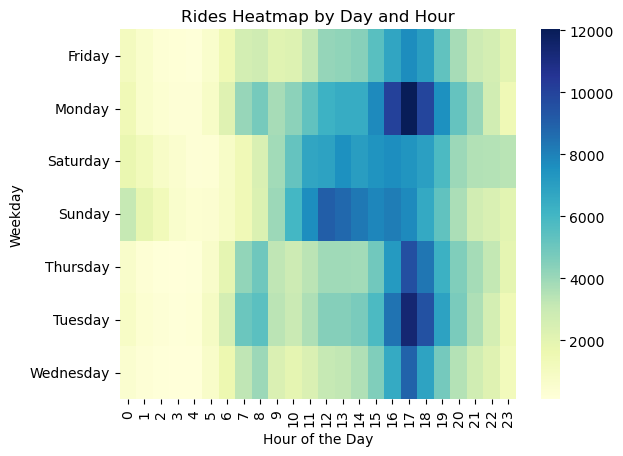

In [15]:
# Analyse der Stoßzeiten nach Wochentag und Stunde
peak_hours = df.groupby(['weekday', 'start_hour']).size().unstack()
sns.heatmap(peak_hours, cmap='YlGnBu')
plt.title('Rides Heatmap by Day and Hour')
plt.ylabel('Weekday')
plt.xlabel('Hour of the Day')
plt.show()


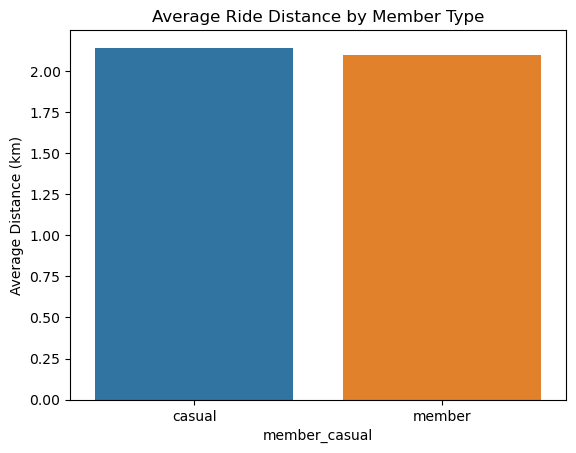

In [68]:
from geopy.distance import geodesic
import numpy as np

# Funktion zur Berechnung der Distanz, die NaN-Werte handhabt
def calculate_distance(row):
    # Überprüfen, ob die Koordinaten NaN-Werte sind
    if np.isnan(row['start_lat']) or np.isnan(row['start_lng']) or np.isnan(row['end_lat']) or np.isnan(row['end_lng']):
        return np.nan
    start_point = (row['start_lat'], row['start_lng'])
    end_point = (row['end_lat'], row['end_lng'])
    return geodesic(start_point, end_point).km

# Anwendung der Funktion unter Berücksichtigung von NaN-Werten
df['ride_distance'] = df.apply(calculate_distance, axis=1)

# Durchschnittliche Distanz nach Mitgliedstyp
avg_distance_by_member = df.groupby('member_casual')['ride_distance'].mean()
sns.barplot(x=avg_distance_by_member.index, y=avg_distance_by_member.values)
plt.title('Average Ride Distance by Member Type')
plt.ylabel('Average Distance (km)')
plt.show()


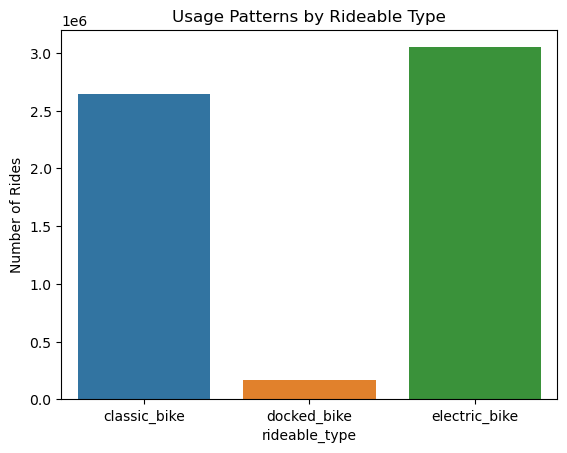

In [19]:
# Nutzungsmuster nach Fahrradtyp
usage_by_ride_type = df.groupby('rideable_type').size()
sns.barplot(x=usage_by_ride_type.index, y=usage_by_ride_type.values)
plt.title('Usage Patterns by Rideable Type')
plt.ylabel('Number of Rides')
plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Annahme: Dein DataFrame heißt 'df'
# df = pd.read_csv('your_data_file.csv')

# Konvertierung der 'started_at' Spalte in datetime
df['started_at'] = pd.to_datetime(df['started_at'])

# Extraktion der Stunde und des Wochentags
df['start_hour'] = df['started_at'].dt.hour
df['weekday'] = df['started_at'].dt.dayofweek  # Montag ist 0, Sonntag ist 6

# Klassifizierung als Wochentag (0-4) oder Wochenende (5-6)
df['day_type'] = df['weekday'].apply(lambda x: 'Weekend' if x > 4 else 'Weekday')

# Gruppierung nach Stunde und Tagtyp
hourly_distribution = df.groupby(['day_type', 'start_hour']).size().reset_index(name='count')

# Visualisierung
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_distribution, x='start_hour', y='count', hue='day_type')
plt.title('Verteilung der Fahrten nach Stunden (Wochentage vs. Wochenende)')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Fahrten')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Tagtyp')

# Speichern als PDF
pdf_path = 'fahrtenverteilung.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig()  # Speichert die aktuelle Figur im PDF
    plt.close()

print(f"Diagramm wurde als '{pdf_path}' gespeichert.")


Diagramm wurde als 'fahrtenverteilung.pdf' gespeichert.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Annahme: Dein DataFrame heißt 'df'
# df = pd.read_csv('your_data_file.csv')

# Konvertierung der 'started_at' Spalte in datetime
df['started_at'] = pd.to_datetime(df['started_at'])

# Extraktion der Stunde und des Wochentags
df['start_hour'] = df['started_at'].dt.hour
df['weekday'] = df['started_at'].dt.dayofweek  # Montag ist 0, Sonntag ist 6

# Klassifizierung als Wochentag (0-4) oder Wochenende (5-6)
df['day_type'] = df['weekday'].apply(lambda x: 'Weekend' if x > 4 else 'Weekday')

# Gruppierung nach Stunde und Tagtyp, Berechnung der Gesamtanzahl der Fahrten je Kategorie
hourly_distribution = df.groupby(['day_type', 'start_hour']).size().reset_index(name='count')
total_rides_per_type = df.groupby('day_type').size().reset_index(name='total_count')

# Zusammenführen der Daten und Berechnung des prozentualen Anteils
hourly_distribution = hourly_distribution.merge(total_rides_per_type, on='day_type')
hourly_distribution['percentage'] = (hourly_distribution['count'] / hourly_distribution['total_count']) * 100

# Visualisierung
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_distribution, x='start_hour', y='percentage', hue='day_type')
plt.title('distribution of trips in percent (weekday vs. weekend)')
plt.xlabel('hour of the day')
plt.ylabel('percent of total trips of categorie')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Tagtyp')



# Speichern als PDF
pdf_path = 'prozentuale_fahrtenverteilung.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig()  # Speichert die aktuelle Figur im PDF
    plt.close()

print(f"Diagramm wurde als '{pdf_path}' gespeichert.")


Diagramm wurde als 'prozentuale_fahrtenverteilung.pdf' gespeichert.


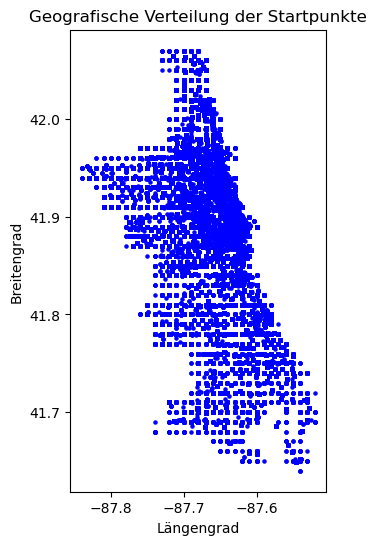

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Konvertierung der Koordinaten in Geopandas-Geometrien
gdf = gpd.GeoDataFrame(
    df, 
    geometry=[Point(xy) for xy in zip(df['start_lng'], df['start_lat'])],
    crs="EPSG:4326")  # EPSG:4326 ist die übliche Koordinatenreferenz für geographische Koordinaten

# Einfache Karte der Startpunkte
gdf.plot(marker='o', color='blue', markersize=5, figsize=(10, 6))
plt.title('Geografische Verteilung der Startpunkte')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.show()


In [16]:
region_geojson = gpd.read_file('/Users/mariu/Downloads/chicago.geojson')

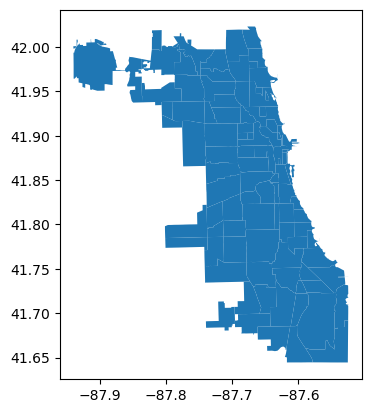

In [18]:
region_geojson.plot()
plt.show()

In [40]:
unique_stations

,start_station_name,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration
0,10101 S Stony Island Ave,F715C83C9A4E9B18,electric_bike,2022-08-13 19:58:36,2022-08-13 20:25:52,922,Phillips Ave & 83rd St,582,41.710000,-87.580000,41.744531,-87.565060,casual,27.266667
1,111th St - Morgan Park Metra,54932094E964F02A,electric_bike,2022-05-09 16:50:29,2022-05-09 16:57:23,682,Walden Pkwy & 103rd St,693,41.690000,-87.670000,41.700000,-87.680000,member,6.900000
2,2112 W Peterson Ave,0B3343C0A131B87E,electric_bike,2022-05-07 13:39:17,2022-05-07 14:06:41,KA1504000155,Broadway & Berwyn Ave,13109,41.991189,-87.683500,41.978353,-87.659753,member,27.400000
3,410,0DA511E177690708,electric_bike,2023-04-27 07:36:16,2023-04-27 07:48:35,410,LaSalle St & Washington St,13006,41.900000,-87.690000,41.920000,-87.690000,casual,12.316667
4,532 E 43rd St,66C14540F47D3BE4,electric_bike,2022-05-27 10:53:54,2022-05-27 11:07:59,913,MLK Jr Dr & 29th St,TA1307000139,41.820000,-87.610000,41.842052,-87.617000,casual,14.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,Yale Ave & 119th St,C709DDFE42370ABF,electric_bike,2022-07-12 14:22:38,2022-07-12 14:32:07,588,State St & 123rd St,20210,41.680000,-87.630000,41.710000,-87.620000,casual,9.483333
1693,Yates Blvd & 75th St,18335FC07B8828C1,classic_bike,2022-05-06 07:46:38,2022-05-06 07:54:42,KA1503000024,Bennett Ave & 79th St,16970,41.758768,-87.566440,41.751785,-87.578496,casual,8.066667
1694,Yates Blvd & 93rd St,B890FDC60ACC660B,classic_bike,2022-05-13 14:21:13,2022-05-13 14:26:38,20237,Clyde Ave & 87th St,20230,41.726166,-87.566276,41.737151,-87.572740,member,5.416667
1695,Yates Blvd & Exchange Ave,AFCC16606B0289C7,electric_bike,2022-05-24 15:21:28,2022-05-24 15:46:12,905,Harper Ave & 59th St,KA1503000070,41.770000,-87.570000,41.770000,-87.570000,member,24.733333


In [46]:
from shapely.geometry import Point

# Erstelle ein GeoDataFrame aus den Startkoordinaten
gdf_stations = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.start_lng, df.start_lat),
    crs="EPSG:4326"
)


In [42]:
from shapely.geometry import Point

# Erstelle ein GeoDataFrame aus den Startkoordinaten
gdf_stations = gpd.GeoDataFrame(
    unique_stations, 
    geometry=gpd.points_from_xy(unique_stations.start_lng, unique_stations.start_lat),
    crs="EPSG:4326"
)


In [47]:
# Räumliche Verknüpfung
df_with_regions = gpd.sjoin(gdf_stations, region_geojson, how="left", op='intersects')

# Das Ergebnis zeigt nun welche Startstation in welcher Nachbarschaft liegt
print(df_with_regions.head())


/Users/mariu/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


            ride_id rideable_type          started_at            ended_at  \
0  EC2DE40644C6B0F4  classic_bike 2022-05-23 23:06:58 2022-05-23 23:40:19   
1  1C31AD03897EE385  classic_bike 2022-05-11 08:53:28 2022-05-11 09:31:22   
2  1542FBEC830415CF  classic_bike 2022-05-26 18:36:28 2022-05-26 18:58:18   
3  6FF59852924528F8  classic_bike 2022-05-10 07:30:07 2022-05-10 07:38:49   
4  483C52CAAE12E3AC  classic_bike 2022-05-10 17:31:56 2022-05-10 17:36:57   

                  start_station_name start_station_id  \
0             Wabash Ave & Grand Ave     TA1307000117   
1  DuSable Lake Shore Dr & Monroe St            13300   
2            Clinton St & Madison St     TA1305000032   
3            Clinton St & Madison St     TA1305000032   
4            Clinton St & Madison St     TA1305000032   

              end_station_name end_station_id  start_lat  start_lng  ...  \
0       Halsted St & Roscoe St   TA1309000025  41.891466 -87.626761  ...   
1  Field Blvd & South Water St          15

In [30]:
# Überprüfen der Spalten und Daten
print(usage_by_neighborhood.dtypes)

# Entfernen von Datumsspalten, wenn notwendig (Beispielhaft)
if 'created_at' in usage_by_neighborhood.columns:
    usage_by_neighborhood = usage_by_neighborhood.drop(columns=['created_at'])

if 'updated_at' in usage_by_neighborhood.columns:
    usage_by_neighborhood = usage_by_neighborhood.drop(columns=['updated_at'])


name           object
usage_count     int64
dtype: object


In [36]:
region_geojson = region_geojson.drop(columns=['updated_at', 'created_at'])


In [48]:
import folium
import geopandas as gpd

# Berechnen der Nutzungszählung
usage_by_neighborhood = df_with_regions.groupby('name').size().reset_index(name='usage_count')

# Entferne alle Timestamp-Spalten, wenn vorhanden
for col in ['created_at', 'updated_at']:
    if col in usage_by_neighborhood.columns:
        usage_by_neighborhood = usage_by_neighborhood.drop(columns=[col])



# Stelle sicher, dass die Koordinaten korrekt sind
latitude = df_with_regions['start_lat'].mean()
longitude = df_with_regions['start_lng'].mean()

# Erstellen der Grundkarte
m = folium.Map(location=[latitude, longitude], zoom_start=12)

# Erstellen der Choropleth-Karte
folium.Choropleth(
    geo_data=region_geojson,
    name='choropleth',
    data=usage_by_neighborhood,
    columns=['name', 'usage_count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='usage density'
).add_to(m)

# Anzeigen der Karte
m.save('choropleth_map.html')
m


In [17]:
import folium
# Annahme: 'region_geojson' ist ein GeoJSON-Objekt, das die Grenzen der Regionen enthält
# und 'df' hat eine Spalte 'region_id' sowie eine Spalte 'usage_count'

# Erstellen der Grundkarte
m = folium.Map(location=[df['start_lat'].mean(), df['start_lng'].mean()], zoom_start=12)

# Erstellen der Choropleth-Karte
folium.Choropleth(
    geo_data=region_geojson,
    name='choropleth',
    data=df,
    columns=['region_id', 'usage_count'],
    key_on='feature.id',  # Dies muss den IDs in deinem GeoJSON entsprechen
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Nutzungsdichte'
).add_to(m)

# Anzeigen der Karte
m.save('choropleth_map.html')
m


KeyError: "None of ['region_id'] are in the columns"

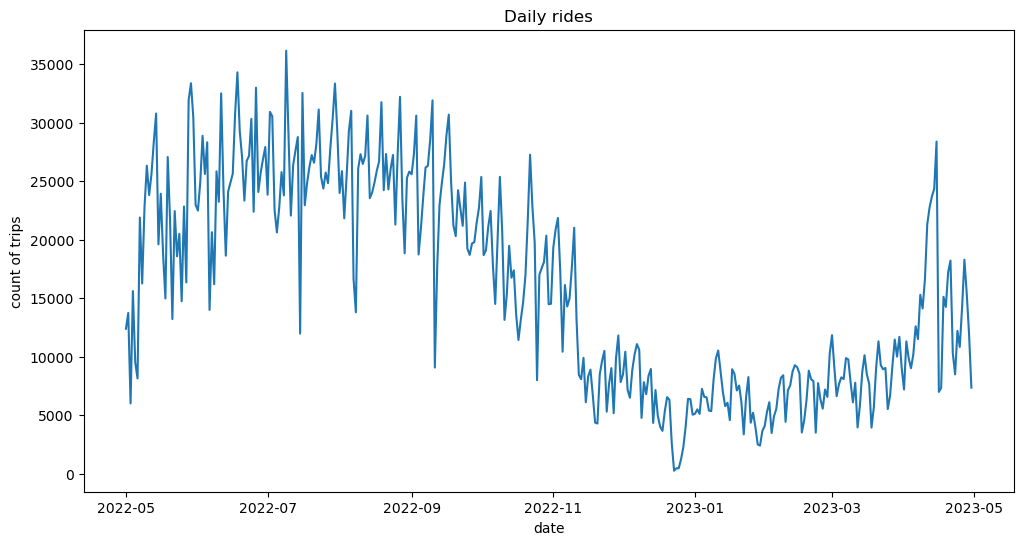

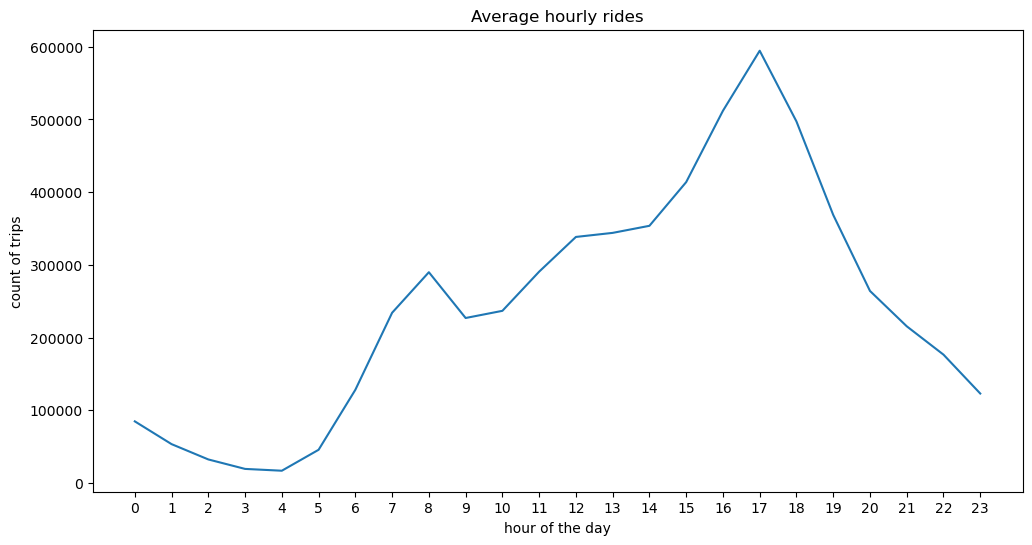

In [10]:
import seaborn as sns

# Konvertierung der 'started_at' Spalte in datetime und Extraktion von Datum und Stunde
df['date'] = df['started_at'].dt.date
df['hour'] = df['started_at'].dt.hour

# Tägliche Fahrtenanzahl
daily_rides = df.groupby('date').size()
plt.figure(figsize=(12, 6))
daily_rides.plot(kind='line')
plt.title('Daily rides')
plt.xlabel('date')
plt.ylabel('count of trips')
plt.show()



# Durchschnittliche stündliche Fahrten
hourly_rides = df.groupby('hour').size()
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rides)
plt.title('Average hourly rides')
plt.xlabel('hour of the day')
plt.ylabel('count of trips')
plt.xticks(range(0, 24))
plt.show()



In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

# Angenommen df['started_at'] ist bereits ein datetime Objekt
df['date'] = df['started_at'].dt.date
df['hour'] = df['started_at'].dt.hour

# Tägliche Fahrtenanzahl
daily_rides = df.groupby('date').size()
fig, ax = plt.subplots(figsize=(12, 6))
daily_rides.plot(kind='line', ax=ax)
ax.set_title('Tägliche Anzahl der Fahrten')
ax.set_xlabel('Datum')
ax.set_ylabel('Anzahl der Fahrten')

# Speichern als PDF
pdf_path = 'daily_rides.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig)  # Speichert die angegebene Figur im PDF
    plt.close(fig)

# Durchschnittliche stündliche Fahrten
hourly_rides = df.groupby('hour').size()
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=hourly_rides, ax=ax)
ax.set_title('Durchschnittliche stündliche Fahrten')
ax.set_xlabel('Stunde des Tages')
ax.set_ylabel('Anzahl der Fahrten')
ax.set_xticks(range(0, 24))

# Speichern als PDF
pdf_path = 'hourly_rides.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig)  # Speichert die angegebene Figur im PDF
    plt.close(fig)


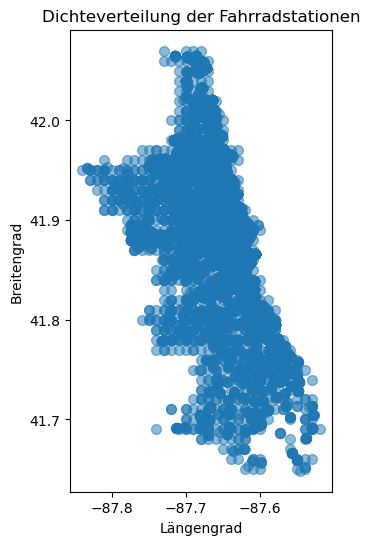

In [32]:
import geopandas as gpd
from shapely.geometry import Point

# Erstellen eines reduzierten DataFrames ohne Duplikate
reduced_df = df[['start_station_name', 'start_lat', 'start_lng']].drop_duplicates()

# Erstellen des GeodataFrames
stations = gpd.GeoDataFrame(
    reduced_df,
    geometry=gpd.points_from_xy(reduced_df['start_lng'], reduced_df['start_lat']),
    crs="EPSG:4326"
)

# Dichteverteilung der Stationen
stations.plot(markersize=50, alpha=0.5, figsize=(10, 6))
plt.title('Dichteverteilung der Fahrradstationen')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.show()



In [29]:
import folium
from folium.plugins import HeatMap

# Auswahl einiger Daten für die Heatmap
sample_df = df.sample(1000)  # Begrenzung für Performance-Gründe

# Erstellen einer Karte
m = folium.Map(location=[sample_df['start_lat'].mean(), sample_df['start_lng'].mean()], zoom_start=11)

# Heatmap der Startpunkte hinzufügen
HeatMap(data=sample_df[['start_lat', 'start_lng']], radius=10).add_to(m)

# Karte anzeigen
m

/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_2235/850071593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['started_at'].dt.day_name()
/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_2235/850071593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['started_at'].dt.hour


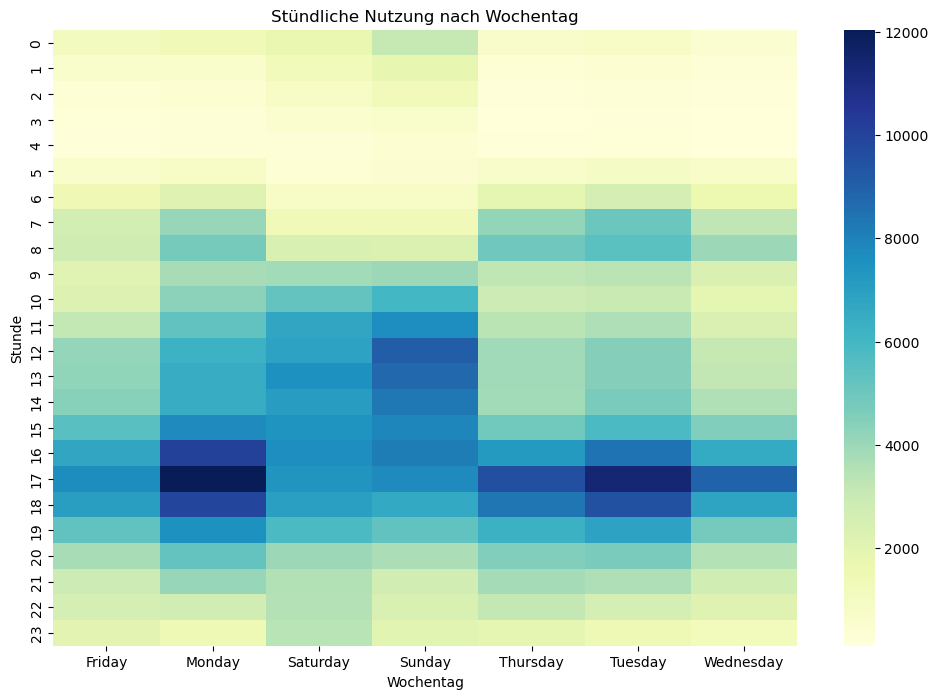

In [31]:
import seaborn as sns

df['weekday'] = df['started_at'].dt.day_name()
df['hour'] = df['started_at'].dt.hour

pivot_table = df.pivot_table(index='hour', columns='weekday', values='ride_id', aggfunc='count')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Stündliche Nutzung nach Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Stunde')
plt.show()


/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_2235/2835567597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['started_at'] = pd.to_datetime(df['started_at'], dayfirst=True)
/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_2235/2835567597.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_hour'] = df['started_at'].dt.hour


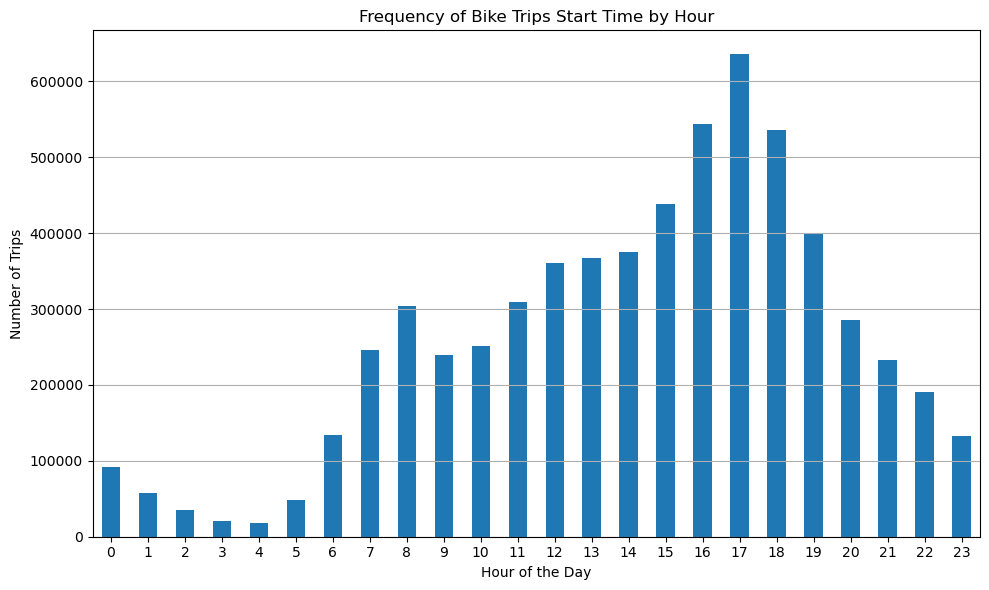

In [50]:
# Converting trip_start_time to datetime
df['started_at'] = pd.to_datetime(df['started_at'], dayfirst=True)

# Extracting hour from trip_start_time
df['start_hour'] = df['started_at'].dt.hour

# Counting the frequency of each start hour
hourly_counts = df['start_hour'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar')
plt.title('Frequency of Bike Trips Start Time by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

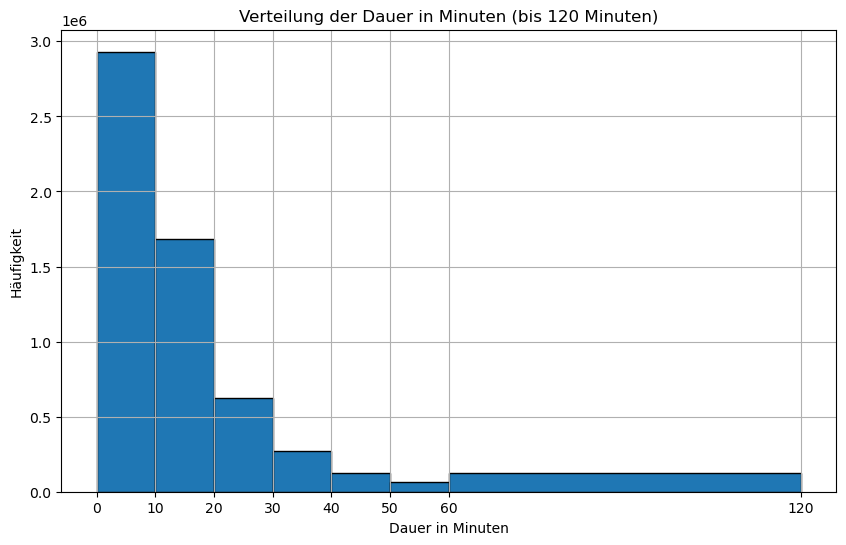

In [59]:


# Assuming df is your DataFrame
# Convert 'started_at' and 'ended_at' to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate duration in seconds
df['duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()

import matplotlib.pyplot as plt
# Konvertieren Sie die Dauer von Sekunden in Minuten
df['duration_minutes'] = df['duration'] / 60

import matplotlib.pyplot as plt


# Entfernen Sie alle Zeilen, bei denen die Dauer 120 Minuten übersteigt
df = df[df['duration_minutes'] <= 120]

# Jetzt können Sie den Rest des Codes erneut ausführen, um das Histogramm zu erstellen
# Stellen Sie sicher, dass die Bins-Definition den angepassten Daten entspricht
bins = [0, 10, 20, 30, 40, 50, 60, df['duration_minutes'].max()]

# Erstellen Sie das Histogramm
plt.figure(figsize=(10, 6))
plt.hist(df['duration_minutes'], bins=bins, edgecolor='black')

plt.title('Verteilung der Dauer in Minuten (bis 120 Minuten)')
plt.xlabel('Dauer in Minuten')
plt.ylabel('Häufigkeit')
plt.xticks(bins)  # Setzt die X-Achsen-Ticks auf die Grenzen der Intervalle
plt.grid(True)
plt.show()





In [7]:
# Top 10 Abfahrtsstationen
top_departure_stations = df['start_station_name'].value_counts().head(10)
print("Top 10 Abfahrtsstationen:\n", top_departure_stations)

# Top 10 Ankunftsstationen
top_arrival_stations = df['end_station_name'].value_counts().head(10)
print("\nTop 10 Ankunftsstationen:\n", top_arrival_stations)


Top 10 Abfahrtsstationen:
 Streeter Dr & Grand Ave               9836
DuSable Lake Shore Dr & Monroe St     5710
Michigan Ave & Oak St                 5419
DuSable Lake Shore Dr & North Blvd    5255
Theater on the Lake                   4510
Millennium Park                       4489
Wells St & Concord Ln                 4444
Clark St & Elm St                     3915
University Ave & 57th St              3843
Clark St & Armitage Ave               3800
Name: start_station_name, dtype: int64

Top 10 Ankunftsstationen:
 Streeter Dr & Grand Ave               10023
DuSable Lake Shore Dr & North Blvd     5689
Michigan Ave & Oak St                  5541
DuSable Lake Shore Dr & Monroe St      5502
Theater on the Lake                    4699
Millennium Park                        4478
Wells St & Concord Ln                  4395
University Ave & 57th St               3876
Clark St & Elm St                      3872
Clark St & Armitage Ave                3787
Name: end_station_name, dtype: int64

In [61]:
# Berechnung der Fahrtzeit in Minuten
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Durchschnittliche Fahrtzeit für jede Abfahrtsstation
avg_departure_duration = df.groupby('start_station_name')['ride_duration'].mean().sort_values(ascending=False).head(10)
print("\nDurchschnittliche Fahrtzeit von den Top 10 Abfahrtsstationen:\n", avg_departure_duration)

# Durchschnittliche Fahrtzeit für jede Ankunftsstation
avg_arrival_duration = df.groupby('end_station_name')['ride_duration'].mean().sort_values(ascending=False).head(10)
print("\nDurchschnittliche Fahrtzeit zu den Top 10 Ankunftsstationen:\n", avg_arrival_duration)



Durchschnittliche Fahrtzeit von den Top 10 Abfahrtsstationen:
 start_station_name
Public Rack - Ellis Ave & Doty Ave                     114.666667
Harvard Ave & 119th St                                  88.483333
Champlain Ave & 134th St                                88.405556
Eggleston Ave & 115th St                                84.841667
May St & 78th St                                        80.116667
Public Rack - Oglesby Ave & 95th St                     75.866667
Racine Ave & 83rd St                                    71.783333
Public Rack - Spencer Elementary Technology Academy     69.916667
Ellis Ave & 132nd Pl                                    62.633333
Austin Blvd & North Ave                                 57.636667
Name: ride_duration, dtype: float64

Durchschnittliche Fahrtzeit zu den Top 10 Ankunftsstationen:
 end_station_name
Kildare Ave & Division Ave            104.100000
Public Rack - Perry Ave & 111th St     97.241667
Vincennes Ave & 87th St                89.6

In [62]:
# Stunde der Fahrt hinzufügen
df['start_hour'] = df['started_at'].dt.hour

# Gruppieren nach Station und Stunde, dann zählen
peak_times = df.groupby(['start_station_name', 'start_hour']).size().reset_index(name='count')

# Finden der Spitzenstunde für jede Station
peak_times = peak_times.loc[peak_times.groupby('start_station_name')['count'].idxmax()]

print("\nSpitzenzeiten der Abfahrtsstationen:\n", peak_times.head(10))



Spitzenzeiten der Abfahrtsstationen:
                     start_station_name  start_hour  count
0             10101 S Stony Island Ave           9      1
7         111th St - Morgan Park Metra          16      5
25                 2112 W Peterson Ave          14     94
36                                 410           8      3
43                       532 E 43rd St          12      4
54   63rd & Western Ave - north corner          11      3
65   63rd & Western Ave - south corner          12      2
85                       63rd St Beach          16     83
109                  900 W Harrison St          16   1330
121                        Abbott Park          15      3


In [63]:
# Verteilung der Mitgliedertypen pro Startstation
member_type_distribution = df.groupby(['start_station_name', 'member_casual']).size().unstack(fill_value=0)
print("\nVerteilung der Mitgliedertypen pro Startstation:\n", member_type_distribution.head(10))



Verteilung der Mitgliedertypen pro Startstation:
 member_casual                      casual  member
start_station_name                               
10101 S Stony Island Ave                3       0
111th St - Morgan Park Metra            7       7
2112 W Peterson Ave                   393     629
410                                     2       5
532 E 43rd St                          17      17
63rd & Western Ave - north corner      14       0
63rd & Western Ave - south corner       5       5
63rd St Beach                         405     315
900 W Harrison St                    3512    9930
Abbott Park                            12       2


In [70]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,start_hour,weekday,month,duration,duration_minutes,ride_distance
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,33.350000,23,Monday,May,2001.0,33.350000,6.083554
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,37.900000,8,Wednesday,May,2274.0,37.900000,0.602223
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,21.833333,18,Thursday,May,1310.0,21.833333,3.846395
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,8.700000,7,Tuesday,May,522.0,8.700000,0.804551
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,5.016667,17,Tuesday,May,301.0,5.016667,0.915197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859056,8B441A6C436E9900,classic_bike,2023-04-29 21:20:21,2023-04-29 21:30:19,Halsted St & 18th St,13099,Blue Island Ave & 18th St,13135,41.857506,-87.645991,41.857556,-87.661535,casual,9.966667,21,Saturday,April,598.0,9.966667,1.290676
5859057,3980D64BE11540F1,classic_bike,2023-04-24 09:16:05,2023-04-24 09:22:27,Halsted St & 18th St,13099,Blue Island Ave & 18th St,13135,41.857506,-87.645991,41.857556,-87.661535,casual,6.366667,9,Monday,April,382.0,6.366667,1.290676
5859058,3EF4B49FF7DAA02C,classic_bike,2023-04-18 07:53:51,2023-04-18 07:59:16,Franklin St & Jackson Blvd,TA1305000025,Clark St & Randolph St,TA1305000030,41.877708,-87.635321,41.884576,-87.631890,casual,5.416667,7,Tuesday,April,325.0,5.416667,0.814297
5859059,210B2ED6583DC231,classic_bike,2023-04-29 07:33:55,2023-04-29 07:38:57,Michigan Ave & Lake St,TA1305000011,Clark St & Randolph St,TA1305000030,41.886022,-87.624398,41.884576,-87.631890,casual,5.033333,7,Saturday,April,302.0,5.033333,0.642224


In [66]:
# Entfernen von Zeilen mit NaN-Werten in Koordinatenspalten
df_cleaned = df.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'])

# Funktion zur Berechnung der Distanz
def calculate_distance(row):
    start_point = (row['start_lat'], row['start_lng'])
    end_point = (row['end_lat'], row['end_lng'])
    return geodesic(start_point, end_point).km

# Anwendung der Funktion auf jede Zeile des bereinigten DataFrames
df_cleaned['ride_distance'] = df_cleaned.apply(calculate_distance, axis=1)



KeyboardInterrupt: 

In [71]:
# Durchschnittliche Distanz von den Abfahrtsstationen
avg_departure_distance = df.groupby('start_station_name')['ride_distance'].mean().sort_values(ascending=False).head(10)
print("\nDurchschnittliche Distanz von den Top 10 Abfahrtsstationen:\n", avg_departure_distance)

# Durchschnittliche Distanz zu den Ankunftsstationen
avg_arrival_distance = df.groupby('end_station_name')['ride_distance'].mean().sort_values(ascending=False).head(10)
print("\nDurchschnittliche Distanz zu den Top 10 Ankunftsstationen:\n", avg_arrival_distance)



Durchschnittliche Distanz von den Top 10 Abfahrtsstationen:
 start_station_name
Eggleston Ave & 115th St                      22.275962
Racine Ave & 83rd St                          14.534379
Public Rack - N Sayre Ave & W Belden Ave      11.008851
Legler Regional Library                        9.590275
Public Rack - Normal Ave & 111th St            9.112759
Harvard Ave & 119th St                         9.040202
Public Rack - Justine St & 87th St             7.557826
Central Park Ave & Fillmore St                 7.313653
Ada St & 117th St                              6.757650
Public Rack - Rutherford Ave & Belmont Ave     6.458395
Name: ride_distance, dtype: float64

Durchschnittliche Distanz zu den Top 10 Ankunftsstationen:
 end_station_name
Green St & Madison Ave*                        157.320207
Vincennes Ave & 87th St                         20.805819
Public Rack - Perry Ave & 111th St              13.737174
Mackinaw Ave & 85th St                          12.538722
Wolcott Ave &

In [76]:
import folium

# Ermitteln der Top 10 Abfahrtsstationen
top_departure_stations = df['start_station_name'].value_counts().head(10).index.tolist()

# Ermitteln der Top 10 Ankunftsstationen
top_arrival_stations = df['end_station_name'].value_counts().head(10).index.tolist()

# Extrahieren der Koordinaten der Top 10 Abfahrts- und Ankunftsstationen
top_departure_data = df[df['start_station_name'].isin(top_departure_stations)].drop_duplicates(subset=['start_station_name'])
top_arrival_data = df[df['end_station_name'].isin(top_arrival_stations)].drop_duplicates(subset=['end_station_name'])

# Erstellen einer Karte, zentriert um die durchschnittlichen Koordinaten aller Top Stationen
m = folium.Map(location=[
    (top_departure_data['start_lat'].mean() + top_arrival_data['end_lat'].mean()) / 2,
    (top_departure_data['start_lng'].mean() + top_arrival_data['end_lng'].mean()) / 2
], zoom_start=12)

# Hinzufügen von Markern für die Top 10 Abfahrtsstationen
for _, row in top_departure_data.iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup=f"Abfahrt: {row['start_station_name']}",
        icon=folium.Icon(color='blue', icon='upload')
    ).add_to(m)

# Hinzufügen von Markern für die Top 10 Ankunftsstationen
for _, row in top_arrival_data.iterrows():
    folium.Marker(
        location=[row['end_lat'], row['end_lng']],
        popup=f"Ankunft: {row['end_station_name']}",
        icon=folium.Icon(color='red', icon='download')
    ).add_to(m)

# Anzeigen der Karte
m


In [77]:
from folium.plugins import MarkerCluster

# Erstellen einer neuen Karte
m = folium.Map(location=[
    (top_departure_data['start_lat'].mean() + top_arrival_data['end_lat'].mean()) / 2,
    (top_departure_data['start_lng'].mean() + top_arrival_data['end_lng'].mean()) / 2
], zoom_start=12)

# Erstellen eines Marker-Clusters für Abfahrtsstationen
departure_cluster = MarkerCluster().add_to(m)

# Hinzufügen von Markern zum Abfahrts-Cluster
for _, row in top_departure_data.iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup=f"Abfahrt: {row['start_station_name']}",
        icon=folium.Icon(color='blue', icon='upload')
    ).add_to(departure_cluster)

# Erstellen eines Marker-Clusters für Ankunftsstationen
arrival_cluster = MarkerCluster().add_to(m)

# Hinzufügen von Markern zum Ankunfts-Cluster
for _, row in top_arrival_data.iterrows():
    folium.Marker(
        location=[row['end_lat'], row['end_lng']],
        popup=f"Ankunft: {row['end_station_name']}",
        icon=folium.Icon(color='red', icon='download')
    ).add_to(arrival_cluster)

# Anzeigen der Karte
m
